In [1]:
#importing the libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

About the data set (Insurance claim data)

The dataset contains information about the insurance claims, beneficiaries, and providers that may contribute to the potential fraudulent claims.

Attribute information:

- BeneID- Beneficiary ID.
- ClaimID - Claim ID .
- ClaimStartDt - The date when the claim was submitted.
- ClaimEndDt- The date when reimbursement was done.
- Provider - Person/Company that provides a healthcare service.
- InscClaimAmtReimbursed- Expense that was paid, and are covered for under policy (Reimbursed).
- AttendingPhysician- A physician who has treated or currently treating, a person seeking insurance.
- OperatingPhysician- A physician who performs a procedure/surgery on the person seeking insurance
- OtherPhysician                         - Other physicians involved
- AdmissionDt                            - The date on which the beneficiary was admitted in healthcare facility
- ClmAdmitDiagnosisCode                  - 
- DeductibleAmtPaid                      - The amount paid for the diagnosis/procedure by the beneficiary
- DischargeDt                            - The date on which the beneficiary was discharged from healthcare facility
- DiagnosisGroupCode                     - Code indicating the healthcare diagnosis package
- ClmDiagnosisCode_1 to 10               - Code indicating different diagnostic tests       
- ClmProcedureCode_1 to 6                - Code indicating different medical procedures    
- PotentialFraud                              - Indicates if this is a potential fraudulent claim
- DOB                                         - Date of Birth of Beneficiary
- DOD                                         - Date of Death of deceased Beneficiary
- Gender                                      - Gender of the beneficiary
- Race                                        - Racial background of the beneficiary
- RenalDiseaseIndicator                       - Indicates if the beneficiary has been affected with Renal disease
- State                                       - State in which the beneficiary is residing
- County                                      - County to which the beneficiary belongs 
- NoOfMonths_PartACov                         - 
- NoOfMonths_PartBCov                         -
- ChronicCond_Alzheimer                       - Indicates if the beneficiary has been affected with Chronic Alzheimer’s
- ChronicCond_Heartfailure                    - Indicates if the beneficiary has been affected with Chronic Heart condition
- ChronicCond_KidneyDisease                   - Indicates if the beneficiary has been affected with Chronic Kidney Disease
- ChronicCond_Cancer                          - Indicates if the beneficiary has been affected with Chronic Cancer
- ChronicCond_ObstrPulmonary                  - Indicates if the beneficiary has been affected with Chronic Obstruction of Pulmonary
- ChronicCond_Depression                      - Indicates if the beneficiary has been affected with Chronic Depression
- ChronicCond_Diabetes                        - Indicates if the beneficiary has been affected with Chronic Diabetes
- ChronicCond_IschemicHeart                   - Indicates if the beneficiary has been affected with Chronic Ischemic Heart      - ChronicCond_Osteoporasis                    - Indicates if the beneficiary has been affected with Chronic Osteoporosis        - ChronicCond_rheumatoidarthritis             - Indicates if the beneficiary has been affected with Chronic rheumatoid arthritis  
- ChronicCond_stroke                          - Indicates if the beneficiary has been affected with Chronic stroke               - IPAnnualReimbursementAmt                    - Amount reimbursed for the inpatient beneficiary annually
- IPAnnualDeductibleAmt                       - Amount deducted from the inpatient beneficiary annually
- OPAnnualReimbursementAmt                    - Amount reimbursed for the outpatient beneficiary annually
- OPAnnualDeductibleAmt                       - Amount deducted from the outpatient beneficiary annually

In [3]:
Train_provider = pd.read_csv('Train-1542865627584.csv') 
Train_Beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
Train_inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
Train_Outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [4]:
df_train = pd.concat([Train_inpatient,Train_Outpatient])
df_train = pd.merge(df_train,Train_provider,on = 'Provider',how = 'outer')
df_train = pd.merge(df_train,Train_Beneficiary,on = 'BeneID',how = 'outer')

# Understanding the data

In [5]:
df_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20
4,BENE17521,CLM119066,2009-01-04,2009-01-04,PRV55950,100,PHY311794,NaN,PHY394035,NaN,NaN,0.0,NaN,NaN,4919,1629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20


In [6]:
df_train.shape

(558211, 55)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

From the above output, we see that the data type of some of the categorical columns is 'int64'.
so we will convert these variables data type to 'object'.

In [8]:
for i in df_train.iloc[:,24:30]:
    df_train[i] = df_train[i].astype(object)
for i in df_train.iloc[:,33:35]:
    df_train[i] = df_train[i].astype(object)
for i in df_train.iloc[:,36:51]:
    df_train[i] = df_train[i].astype(object)

In [9]:
#converting datetime variables from object to datetime
for column in ['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt','DOB','DOD']:
    df_train[column] = pd.to_datetime(df_train[column])

In [10]:
df_train.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


# Missing values

In [11]:
Total = df_train.isnull().sum().sort_values(ascending=False) 

Percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
ClmProcedureCode_6,558211,100.000000
ClmProcedureCode_5,558202,99.998388
ClmProcedureCode_4,558093,99.978861
ClmProcedureCode_3,557242,99.826410
DOD,554080,99.259957
ClmDiagnosisCode_10,553201,99.102490
ClmProcedureCode_2,552721,99.016501
ClmProcedureCode_1,534901,95.824160
AdmissionDt,517737,92.749337
DischargeDt,517737,92.749337


In [12]:
#dropping ClmProcedureCode_6 column has it has only null values
#Some other columns although having large number of null values may be important for further analysis
df_train.drop('ClmProcedureCode_6',axis = 1,inplace = True)

# Analysing Categorical Variables

In [13]:
df_train.describe(include = object)

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
count,558211,558211,558211,556703,114447,199736,145899,40474,547758,362605,243055,164536,111924,84392,66177,53444,41815,5010,23310.0,5490.0,969.0,118.0,9.0,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211,558211
unique,138556,558211,5410,82063,35315,46457,4098,736,10450,5300,4756,4359,3970,3607,3388,3070,2774,1158,1117.0,300.0,154.0,48.0,6.0,2,2,4,2,52,314,13,13,2,2,2,2,2,2,2,2,2,2,2
top,BENE59303,CLM261151,PRV51459,PHY330576,PHY330576,PHY412132,V7612,882,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,No,2,1,0,5,200,12,12,2,1,2,2,2,2,1,1,2,2,2
freq,29,1,8240,2534,424,1247,4074,179,13886,22378,14408,9188,6005,4170,3014,2257,1581,169,1152.0,1736.0,201.0,18.0,3.0,345415,323114,471036,448363,51350,15957,554722,553918,333884,329583,328227,473706,383530,315497,393759,423830,380897,384512,501430


The summary statistics for categorical variables can be interpreted as:

count - Total number of observations unique - Number of unique classes in a variable top - The most repeated class freq - Frequency of most repeated class from the above table we can infer that Beneficiary with BeneID has the highest number of claims.Around 8240 claims have been made through the provider PRV51459 which is more than any other provider. Attending physician PHY330576 is involved in more treatments than other Attending physician similarly other important info can be inferred from the table.

In [14]:
##Replacing 2 with 0 for chronic conditions ,that means chronic condition No is 0 and yes is 1
df_train = df_train.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
df_train = df_train.replace({'RenalDiseaseIndicator': 'Y'}, 1)
for i in df_train.iloc[:,39:50]:
    df_train[i] = df_train[i].astype(object)

In [15]:
df_train['Gender']=df_train['Gender'].replace(2,0)
df_train['Gender']=df_train['Gender'].astype(object)

In [16]:
#ADDING FEATURES
df_train['WhetherDead']= 0
df_train.loc[df_train.DOD.notna(),'WhetherDead'] = 1

In [17]:
df_train['WhetherDead'] = df_train['WhetherDead'].astype(object)

In [18]:
### No of days patient was admitted in the hospital 
df_train['Daysadmitted'] = (df_train['DischargeDt'] - df_train['AdmissionDt']).dt.days

In [19]:
#Age of the patient 
df_train['Age'] = round(((df_train['DOD'] - df_train['DOB']).dt.days)/365)

In [20]:
#DOD is having LOt of NULL values
#We can see Claim end date is max of 2009/12 so we can conclude data is of 2009
#Lets fill the age nulls by calculating it upto 2009
df_train.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - df_train['DOB']).dt.days)/365),inplace=True)

In [21]:
df_train.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


# Analyzing numeric variables

In [22]:
df_train.describe(include = np.number)

,InscClaimAmtReimbursed,DeductibleAmtPaid,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Daysadmitted,Age
count,558211.000000,557312.000000,558211.000000,558211.000000,558211.000000,558211.000000,40474.000000,558211.000000
mean,997.012133,78.421085,5227.971466,568.756807,2278.225348,649.698745,5.665168,73.769770
std,3821.534891,274.016812,11786.274732,1179.172616,3881.846386,1002.020811,5.638538,13.022524
min,0.000000,0.000000,-8000.000000,0.000000,-70.000000,0.000000,0.000000,26.000000
25%,40.000000,0.000000,0.000000,0.000000,460.000000,120.000000,2.000000,68.000000
50%,80.000000,0.000000,0.000000,0.000000,1170.000000,340.000000,4.000000,75.000000
75%,300.000000,0.000000,6000.000000,1068.000000,2590.000000,790.000000,7.000000,82.000000
max,125000.000000,1068.000000,161470.000000,38272.000000,102960.000000,13840.000000,35.000000,101.000000


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.


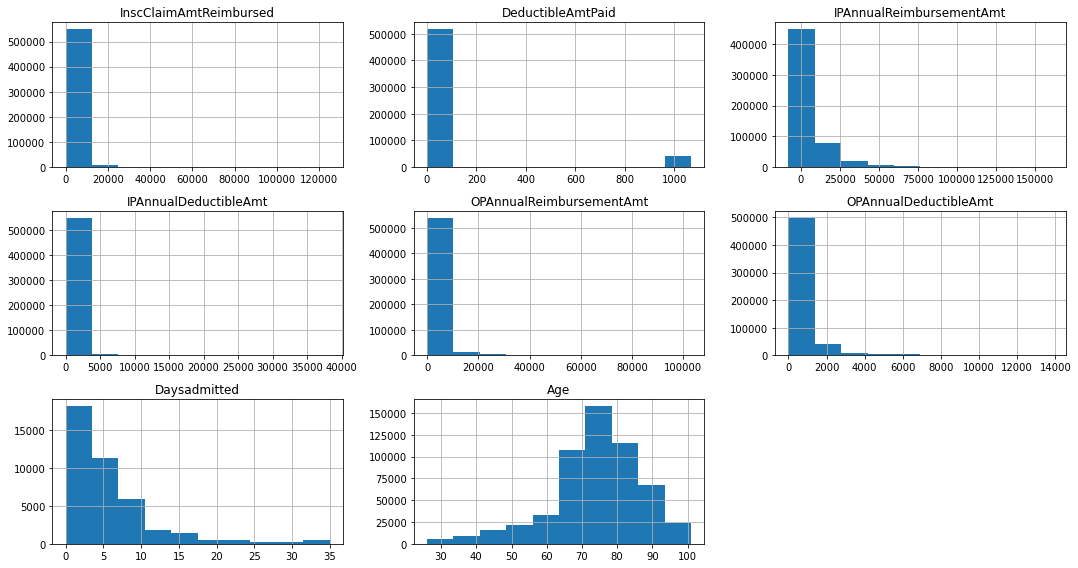

Skewness:


InscClaimAmtReimbursed      9.491424
DeductibleAmtPaid           3.324059
IPAnnualReimbursementAmt    3.994150
IPAnnualDeductibleAmt       8.156711
OPAnnualReimbursementAmt    5.516594
OPAnnualDeductibleAmt       4.356274
Daysadmitted                2.611218
Age                        -0.830820
dtype: float64

In [23]:
plt.rcParams['figure.figsize']=[15,8]
df_train.hist()

plt.tight_layout()

plt.show()  
# print the skewness for each numeric independent variable
print('Skewness:')
# skew() returns the coefficient of skewness for each variable
df_train.select_dtypes(include = np.number).skew()

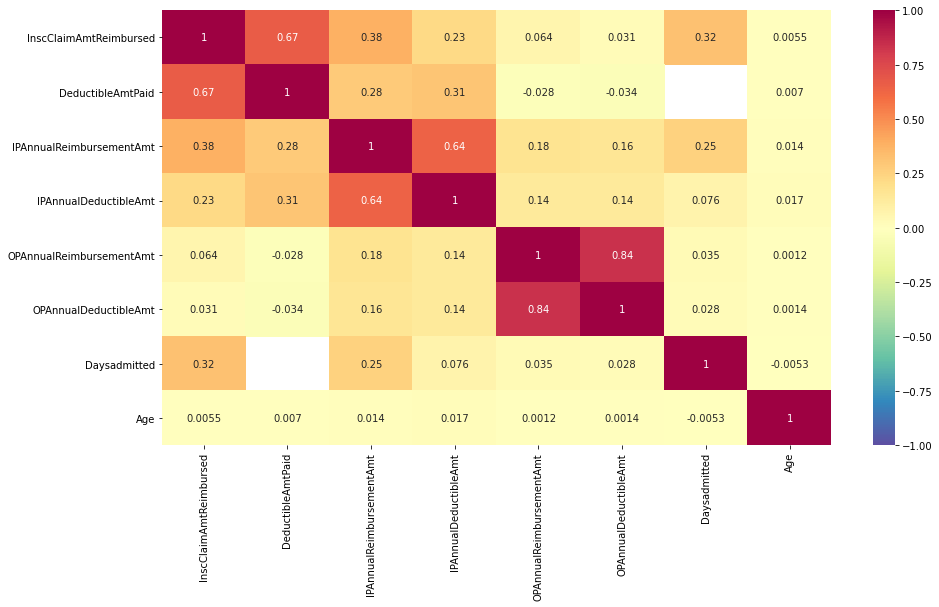

In [24]:
corr =  df_train.select_dtypes(include=np.number).corr()
sns.heatmap(corr,annot = True,vmin = -1,vmax = 1,cmap = 'Spectral_r')
plt.show()

from the above plot we can see that there is high correlation between OPAnnualDeductibleAmt and OPAnnualReimbursementAmt and same can be said for IPAnnualDeductibleAmt and IPAnnualReimbursementAmt  

# Exploratory data analysis on the training dataset

Percent Distribution of Potential Fraud class:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


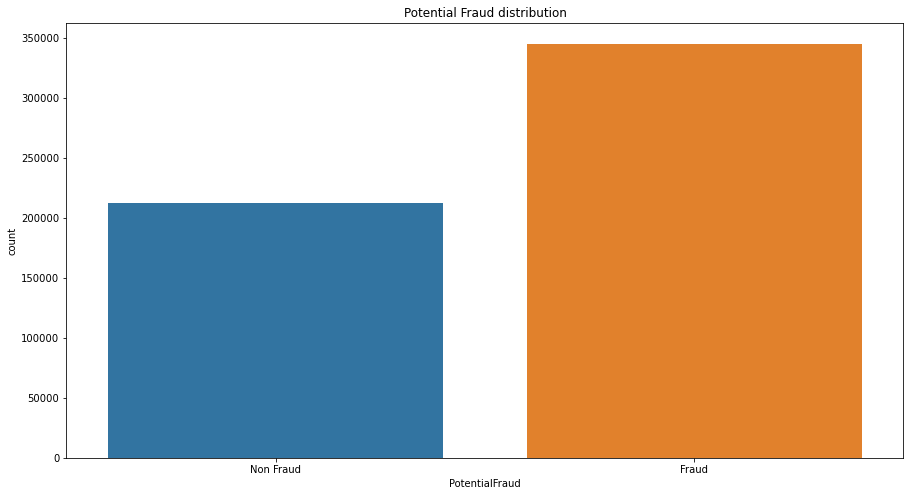

In [25]:
count_classes = pd.value_counts(df_train['PotentialFraud'], sort = True)
print('Percent Distribution of Potential Fraud class:- \n',count_classes*100/len(df_train))
sns.countplot(df_train['PotentialFraud'])
plt.title("Potential Fraud distribution")
plt.xticks(range(2), ["Non Fraud", "Fraud"])
plt.show()

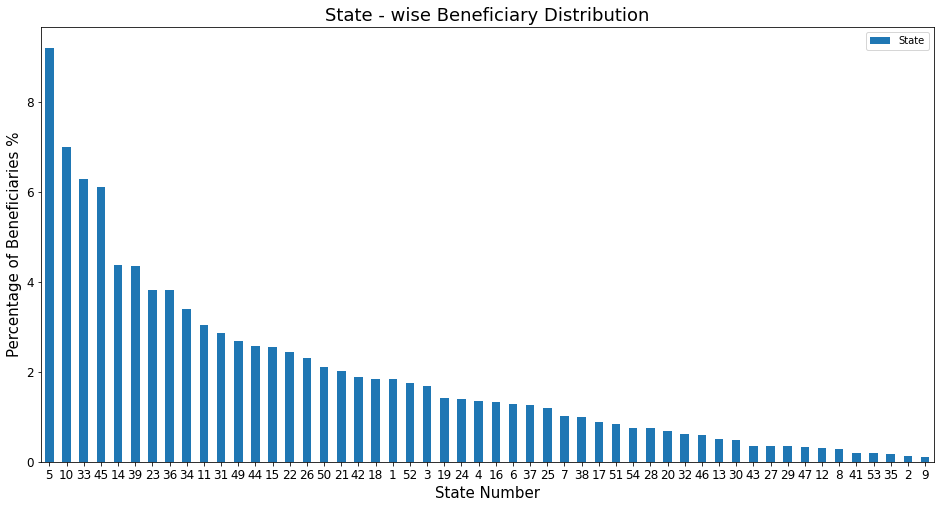

In [26]:
#PLotting the frequencies of Statewise beneficiaries
count_States = pd.value_counts(df_train['State'], sort = True)
#Drawing a barplot
(count_States*100/len(df_train)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)
plt.title("State - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)
plt.show()

Above Plot shows top states with their beneficiary percentage distribution.States 5,10,45 are top states in terms of beneficiary percentage

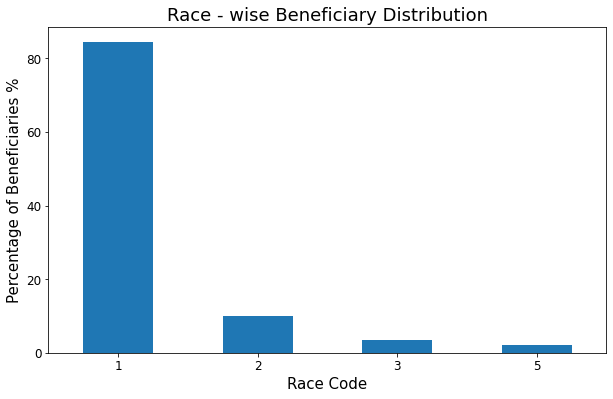

In [27]:
#PLotting the frequencies of race-wise beneficiaries
count_Race = pd.value_counts(df_train['Race'], sort = True)

#Drawing a barplot
(count_Race*100/len(df_train)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.yticks(np.arange(0,100,20))#, ('0 %','20 %', '40 %', '60 %', '80 %', '100%'))
plt.title("Race - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)

plt.show()

from the plot we can infer that more than 80% beneficiaries are of same race which is Race 1 which means Maximum population in the dataset originated from same race.

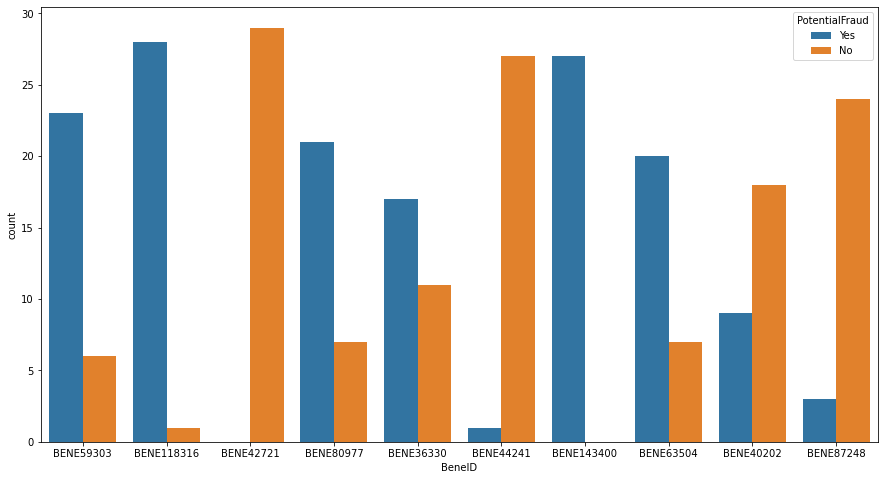

In [28]:
sns.countplot(x='BeneID',hue='PotentialFraud',data=df_train
              ,order=df_train['BeneID'].value_counts().iloc[:10].index)
plt.show()

In [29]:
#finding out top 10 procedure in each procedure code involved in fraudulent claims 

<Figure size 1080x576 with 0 Axes>

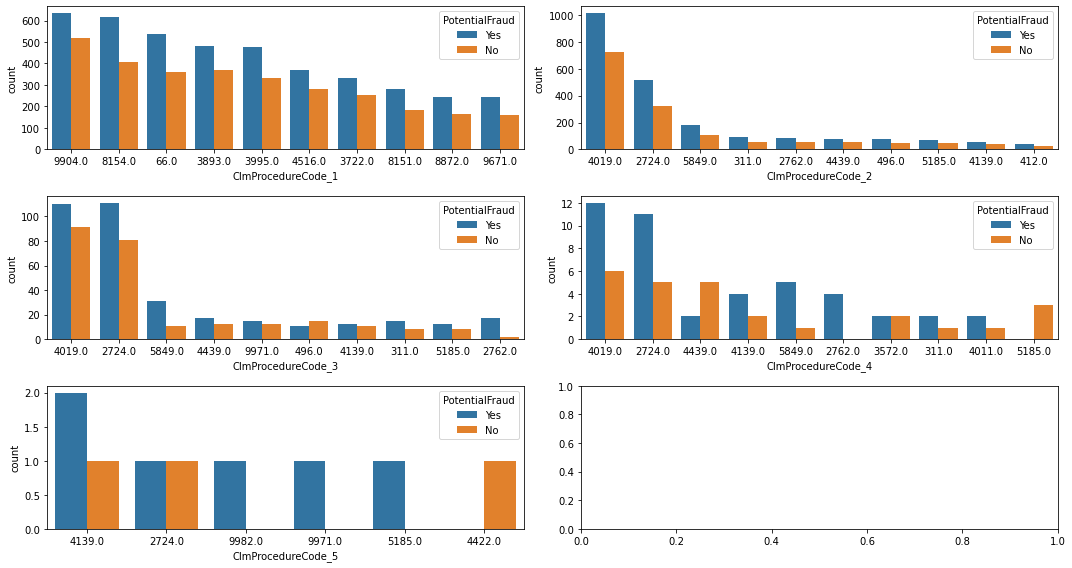

In [30]:
plt.figure(figsize = (15,8))
fig,ax = plt.subplots(3,2)
for column,subplot in zip(df_train.iloc[:,24:29],ax.flatten()):
    z=sns.countplot(x=column,hue='PotentialFraud',data=df_train
              ,order=df_train[column].value_counts().iloc[:10].index,ax = subplot)
    
plt.tight_layout()
plt.show()

From the above plot,we can say that Procedure 9904,4019 and 4139 are top procedures involved in these fraudulent claims

<Figure size 1800x576 with 0 Axes>

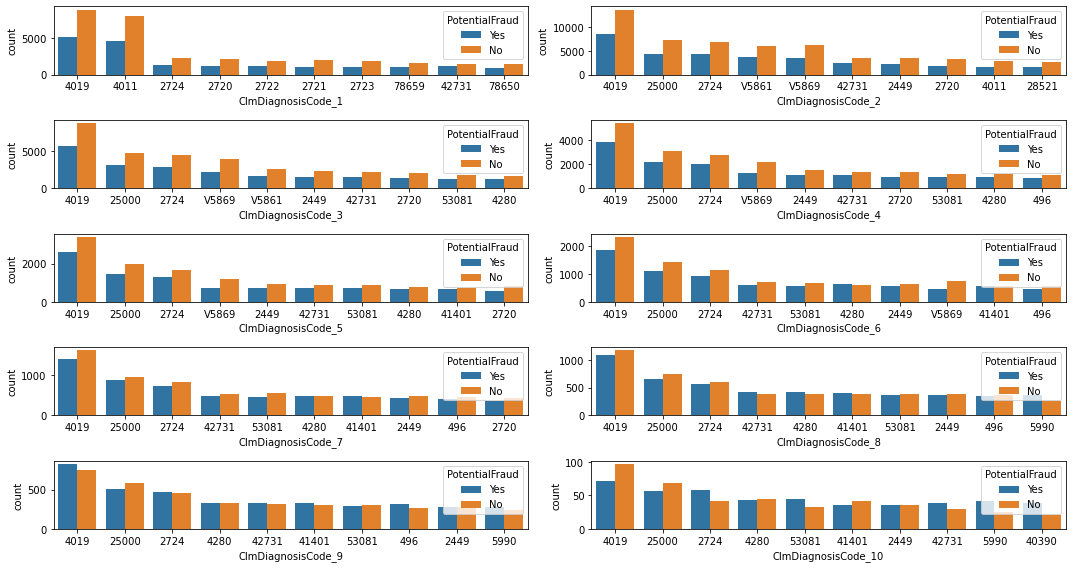

In [31]:
#finding out top 10 diagnosis involved in fraudulent claims 
plt.figure(figsize = (25,8))
fig,ax = plt.subplots(5,2)
for column,subplot in zip(df_train.iloc[:,14:24],ax.flatten()):
    sns.countplot(x=column,hue='PotentialFraud',data=df_train
              ,order=df_train[column].value_counts().iloc[:10].index,ax = subplot)

plt.tight_layout()
plt.show()

From the above plot,we can say that diagnosis 4019,25000 are top diagnosis codes involved in fraudulent claims.

<Figure size 1080x576 with 0 Axes>

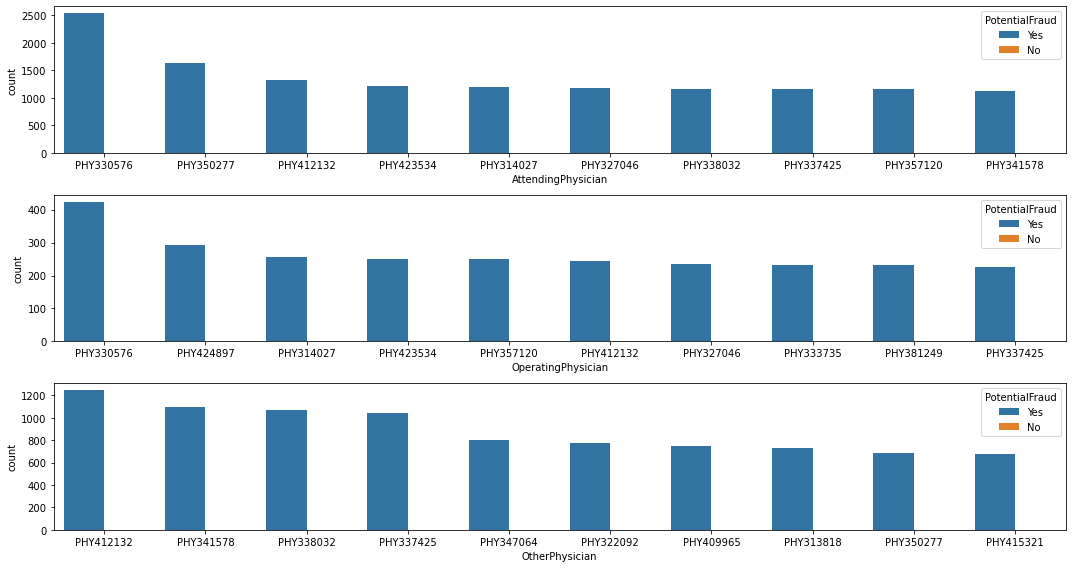

In [32]:
#finding out top 10 physicians involved in the fraudulent claims
plt.figure(figsize = (15,8))
fig,ax = plt.subplots(3,1)
for column,subplot in zip(df_train.iloc[:,6:9],ax.flatten()):
    sns.countplot(x=column,hue='PotentialFraud',data=df_train
              ,order=df_train[column].value_counts().iloc[:10].index,ax = subplot)

plt.tight_layout()
plt.show()

from the plot it can found that these physicians are only involved in fraudulent claims which proves it to be a significant feature in model building.

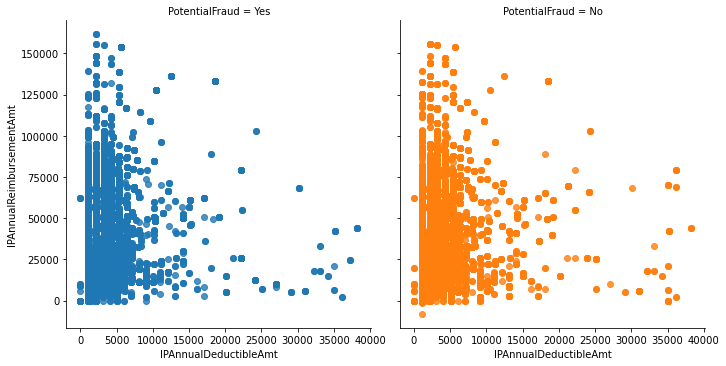

In [33]:
#Plotting IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categories

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=df_train)
plt.show()

from the plot no significant difference can be seen for both categories

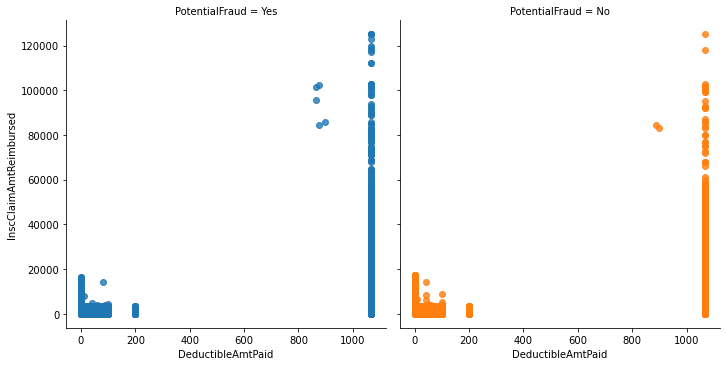

In [34]:
#Plotting DeductibleAmtPaid and InsClaimAmtReimbursed in both fraud and non Fraud Categories

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=df_train)
plt.show()

from the plot We can say that no differentiation can be made between fraud and non fraud cases based on DeductibleAmtPaid and InscClaimAmtReimbursed.

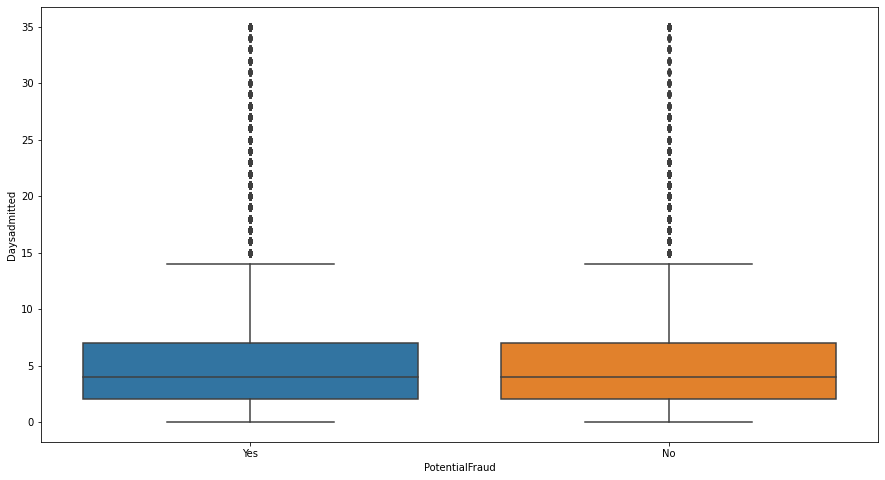

In [35]:
#checking whether number of days admitted for inpatients influence the claims to be fraud.
sns.boxplot(x ='PotentialFraud',y = 'Daysadmitted',data = df_train)
plt.show()

from the above plot we can say that number of days admitted does not help in finding fraudulent claims 

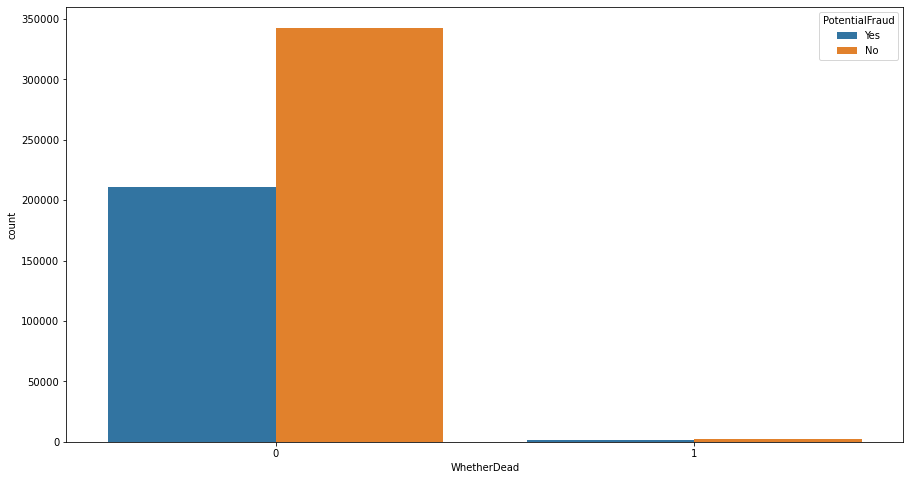

In [36]:
#plotting countplot of whetherdead to potentialfraud
sns.countplot(x ='WhetherDead',hue = 'PotentialFraud',data = df_train)
plt.show()

from the plot it is not clear whether the feature is significant in finding fraulent claims.

In [37]:
#lets compare the percentage of fraudulent claims in both of these categories
a = len(df_train[(df_train['WhetherDead'] == 0) & (df_train['PotentialFraud']=='Yes')])*100/len(df_train[df_train['WhetherDead']==0])
b = len(df_train[(df_train['WhetherDead'] == 1) & (df_train['PotentialFraud']=='Yes')])*100/len(df_train[df_train['WhetherDead']==1])
print('% of fraudulent claims from patients who are alive:',a)
print('% of fraudulent claims from patients who are alive:',b)

% of fraudulent claims from patients who are alive: 38.12662431417846
% of fraudulent claims from patients who are alive: 37.375938029532804


In [38]:
#from the metrics we can say that this feature may not be significant for our model buidling.

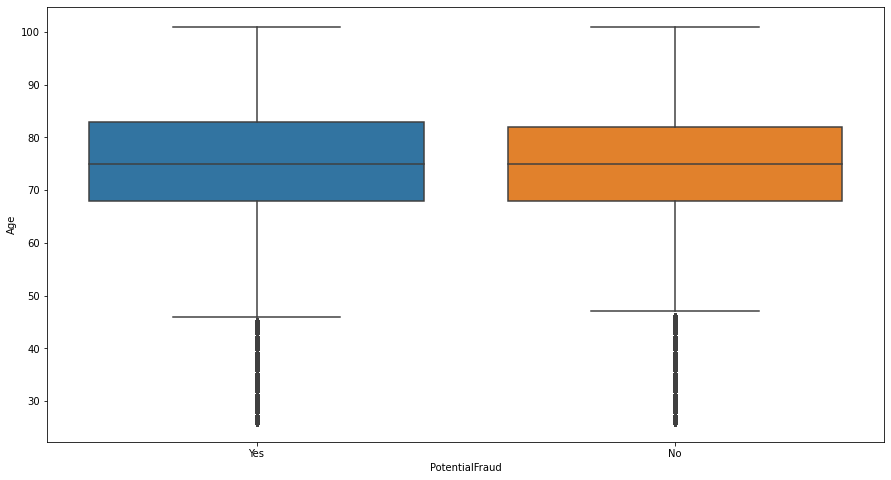

In [39]:
sns.boxplot(df_train['PotentialFraud'],df_train['Age'])
plt.show()

from the above plot we can infer that age is not a significant factor in determining fraudulent claims

<Figure size 1080x576 with 0 Axes>

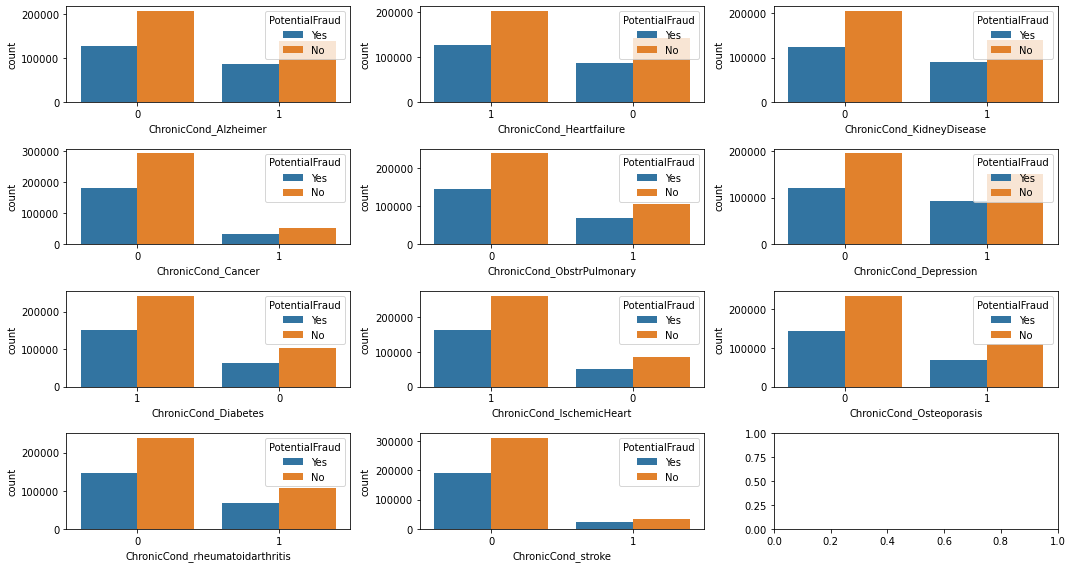

In [41]:
plt.figure(figsize = (15,8))
fig,ax = plt.subplots(4,3)
for column,subplot in zip(df_train.iloc[:,39:50],ax.flatten()):
    sns.countplot(x=column,hue='PotentialFraud',data=df_train
              ,order=df_train[column].value_counts().iloc[:10].index,ax = subplot)

plt.tight_layout()
plt.show()

In [135]:
#checking for duplicate entries
df_train[df_train.duplicated()]
#There are no duplicate observations in the data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,Daysadmitted,Age


<AxesSubplot:xlabel='ClmAdmitDiagnosisCode', ylabel='count'>

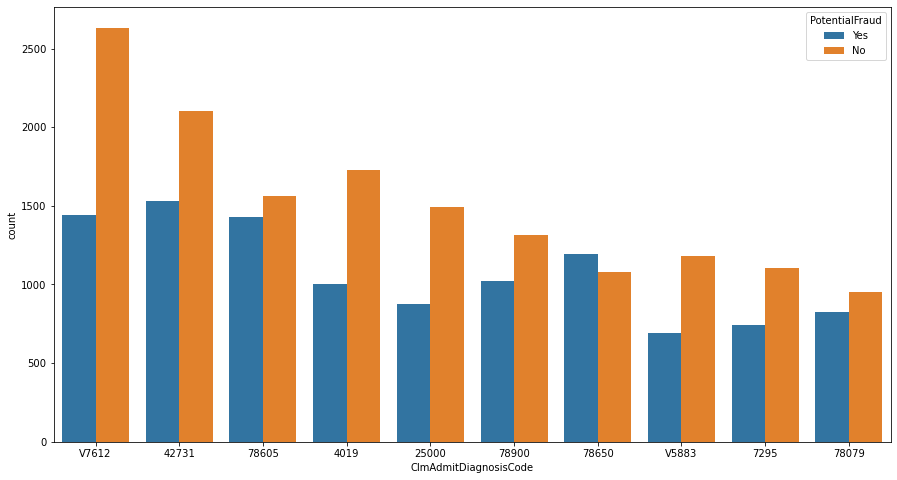

In [136]:
#Visualizing 'ClmAdmitDiagnosisCode' against 'PotentialFraud' to check it sigificance in contributing to the model
plt.figure(figsize = (15,8))
sns.countplot(x='ClmAdmitDiagnosisCode',hue='PotentialFraud',data=df_train
              ,order=df_train['ClmAdmitDiagnosisCode'].value_counts().iloc[:10].index)

In [137]:
#from the plot we can infer that the proportions of frauds vary reasonable for various codes. Thus considering it to be a 
#significant feature

<AxesSubplot:xlabel='DiagnosisGroupCode', ylabel='count'>

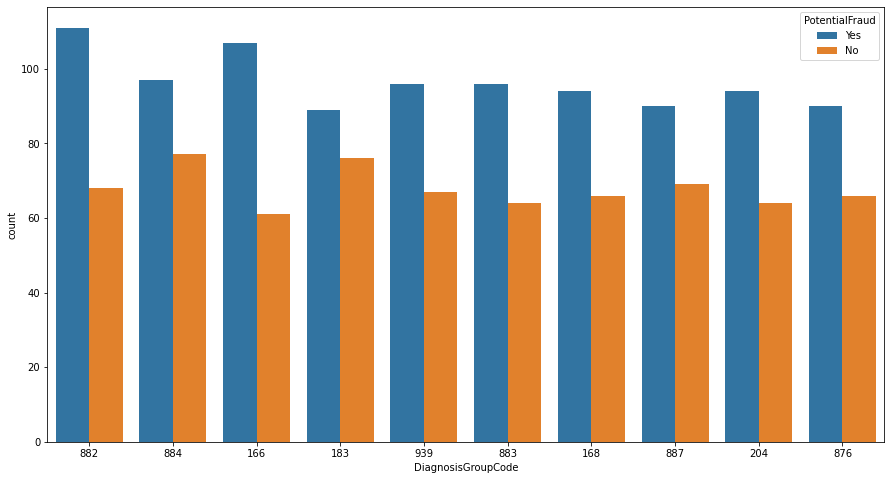

In [138]:
#Visualizing 'DiagnosisGroupCode' against 'PotentialFraud' to check it sigificance in contributing to the model
plt.figure(figsize = (15,8))
sns.countplot(x='DiagnosisGroupCode',hue='PotentialFraud',data=df_train
              ,order=df_train['DiagnosisGroupCode'].value_counts().iloc[:10].index)

In [139]:
#from the plot we can infer that this features gives a lot of info regarding codes which are more involved in fradulent claims.

In [140]:
from scipy.stats import chi2_contingency

In [141]:
#Performing statistical tests to check dependency of the target on each of the following categorical variables
for column in df_train.iloc[:,32:50]:
    table = pd.crosstab(df_train['PotentialFraud'],df_train[column]).values
    test_stat, p, dof, expected_value = chi2_contingency(table,correction = False)
    print('Statistical test to check if %s and claim being fraud are independent'%column)
    print("Test statistic:", test_stat)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected values:", expected_value)
    if p>0.05:
        print('Here the p_value is greater than 0.05 thus we can say that these two columns are independent at 5% level of significance')
    else:
        print('Here the p_value is less than 0.05 thus we can say that these two columns are not independent at 5% level of significance')
    print()

Statistical test to check if Gender and claim being fraud are independent
Test statistic: 0.11786578965664529
p-value: 0.7313608396662786
Degrees of freedom: 1
Expected values: [[199939.48938663 145475.51061337]
 [123174.51061337  89621.48938663]]
Here the p_value is greater than 0.05 thus we can say that these two columns are independent at 5% level of significance

Statistical test to check if Race and claim being fraud are independent
Test statistic: 703.9414756354904
p-value: 2.933423389758317e-152
Degrees of freedom: 3
Expected values: [[291472.04182648  34429.4372558   12199.43126345   7314.08965427]
 [179563.95817352  21210.5627442    7515.56873655   4505.91034573]]
Here the p_value is less than 0.05 thus we can say that these two columns are not independent at 5% level of significance

Statistical test to check if RenalDiseaseIndicator and claim being fraud are independent
Test statistic: 31.896039284188628
p-value: 1.6264846551830452e-08
Degrees of freedom: 1
Expected values: 

In [142]:
#listing out significant categorical features
scf = []
for column in df_train.iloc[:,32:50]:
    table = pd.crosstab(df_train['PotentialFraud'],df_train[column]).values
    test_stat, p, dof, expected_value = chi2_contingency(table,correction = False)
    if p<0.05:
        scf.append(column)
        
print('significant categorical features:',scf)
print('No of sgnificant categorical features:',len(scf))

significant categorical features: ['Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
No of sgnificant categorical features: 15


In [149]:
#from our previous analysis we also know that BeneID,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode
#DiagnosisGroupCode and all features regarding ClmDiagnosisCode and ClmProcedureCode are siginicant.
#add these columns to the list of significant categorical variables
for column in df_train[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician','ClmAdmitDiagnosisCode',
    'DiagnosisGroupCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4',
    'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9',
    'ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
    'ClmProcedureCode_5']]:
    scf.append(column)
    
print(scf)

['Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'BeneID', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']


In [150]:
#listing out indexes of these columns
scf_index = []
for column in scf:
    scf_index.append(df_train.columns.get_loc(column))

print(scf_index)

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 0, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [158]:
#Analysing numerical features for evaluating its significance in detecting fraud

In [156]:
df_num = df_train.select_dtypes(include = [np.number])
df_num = pd.concat([df_num,df_train['PotentialFraud']],axis = 1)
df_num.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Daysadmitted,Age,PotentialFraud
0,26000,1068.0,36000,3204,60,70,6.0,67.0,Yes
1,5000,1068.0,36000,3204,60,70,2.0,67.0,No
2,5000,1068.0,36000,3204,60,70,3.0,67.0,No
3,19000,1068.0,19000,1068,100,20,12.0,96.0,Yes
4,100,0.0,19000,1068,100,20,NaN,96.0,No


In [163]:
df_num.isnull().sum()

InscClaimAmtReimbursed           0
DeductibleAmtPaid              899
IPAnnualReimbursementAmt         0
IPAnnualDeductibleAmt            0
OPAnnualReimbursementAmt         0
OPAnnualDeductibleAmt            0
Daysadmitted                517737
Age                              0
PotentialFraud                   0
dtype: int64

In [159]:
#replacing nulls with zeros in the original dataset and also on the numeric dataset
df_train[df_num.columns] = df_train[df_num.columns].replace(np.nan,0)

In [164]:
df_num[['DeductibleAmtPaid','Daysadmitted']] = df_num[['DeductibleAmtPaid','Daysadmitted']].replace(np.nan,0)

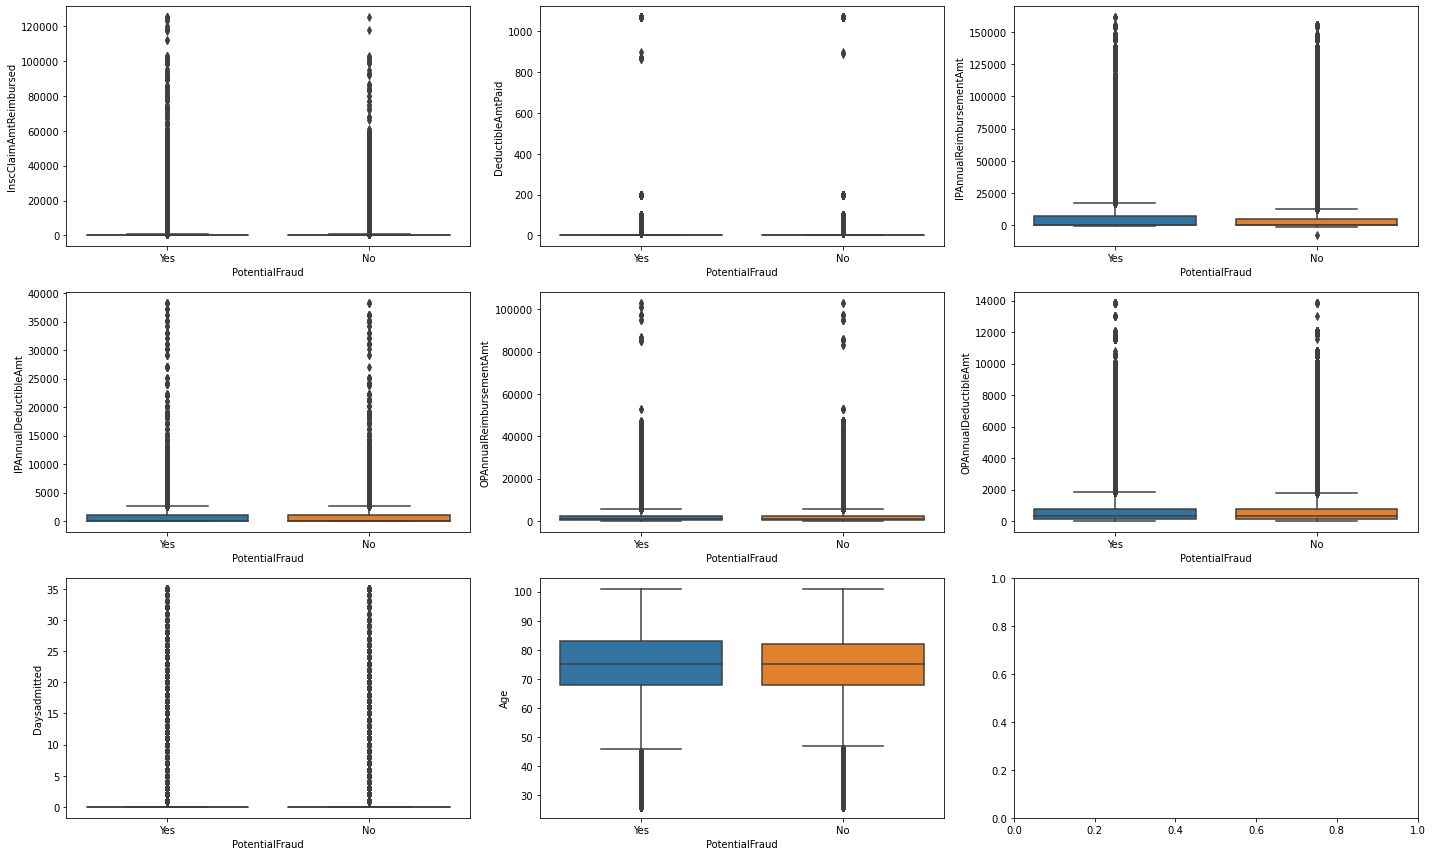

In [171]:
plt.rcParams['figure.figsize'] = [20,12]
fig,ax = plt.subplots(3,3)
for subplot,column in zip(ax.flatten(),df_num.iloc[:,:-1]):
    sns.boxplot(df_num['PotentialFraud'],df_num[column],ax = subplot)
    
plt.tight_layout()
plt.show()

In [174]:
#looking at the plot there's no significant change in distribution that can be obsereved for the two different classes. 
#Also from our previous analysis we have noticed that most of these features are heavily skewed.

In [177]:
#perfroming jarque bera test for confirming the normality assumption.
from scipy.stats import jarque_bera
for column in df_num.iloc[:,:-1]:
    print('pvalue for %s'%column,jarque_bera(df_num[column])[1])

pvalue for InscClaimAmtReimbursed 0.0
pvalue for DeductibleAmtPaid 0.0
pvalue for IPAnnualReimbursementAmt 0.0
pvalue for IPAnnualDeductibleAmt 0.0
pvalue for OPAnnualReimbursementAmt 0.0
pvalue for OPAnnualDeductibleAmt 0.0
pvalue for Daysadmitted 0.0
pvalue for Age 0.0


In [179]:
#the above pvalues suggests that non of these columns follow normal distribution

In [187]:
#checking for Multicollinearity

In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_num.iloc[:,:-1]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['Vif_factor'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif.sort_values(by = ['Vif_factor'],ascending = False)

,Features,Vif_factor
5,OPAnnualDeductibleAmt,4.764245
4,OPAnnualReimbursementAmt,4.557507
1,DeductibleAmtPaid,2.500994
0,InscClaimAmtReimbursed,2.336982
2,IPAnnualReimbursementAmt,2.330377
3,IPAnnualDeductibleAmt,2.244669
6,Daysadmitted,2.166255
7,Age,1.603176


In [192]:
#No mullticollinearity can be observed

In [180]:
#performing Mann-Whitney U Test

The null and alternative hypothesis is:

H0:  𝐹Y=𝐹N 
H1:  𝐹Y≠𝐹N
where FN and FY are the corresponding distributions for fradulent and Non fradulent claims for each of these features

In [184]:
from scipy import stats
for column in df_num.iloc[:,:-1]:
    FY = df_num[df_num['PotentialFraud']=='Yes'][column]
    FN = df_num[df_num['PotentialFraud']=='No'][column]
    test_stat, p_value = stats.mannwhitneyu(FY, FN, alternative = 'two-sided')
    print('p-value for %s'%column, p_value)
    print()

p-value for InscClaimAmtReimbursed 1.5151401481551452e-289

p-value for DeductibleAmtPaid 0.0

p-value for IPAnnualReimbursementAmt 6.641656677565929e-245

p-value for IPAnnualDeductibleAmt 2.329552414170669e-257

p-value for OPAnnualReimbursementAmt 7.115941164619791e-05

p-value for OPAnnualDeductibleAmt 7.532901006240539e-05

p-value for Daysadmitted 0.0

p-value for Age 2.336745487435989e-10



In [194]:
#from the above pvalues we can infer that all of these features are siginificant in contributing to the model

In [195]:
#Applying min max scaler on these features to bring them on the same scale
from sklearn.preprocessing import MinMaxScaler
columns = df_num.iloc[:,:-1].columns
X = df_num.iloc[:,:-1].values
minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(X)
df_num = pd.DataFrame(scaled_data,columns = columns)

In [199]:
#creating df of significant categorical features
df_cat = df_train.iloc[:,scf_index]
df_cat['PotentialFraud'] = df_train['PotentialFraud']

In [200]:
#creating final dataset to fetch in the model
df_final = pd.concat([df_cat,df_num],axis = 1)
df_final.head()

,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,BeneID,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Daysadmitted,Age
0,1,0,39,230,12,12,1,0,1,0,0,1,1,1,1,BENE11001,PHY390922,NaN,NaN,7866,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0.2080,1.0,0.259633,0.083717,0.001262,0.005058,0.171429,0.546667
1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,1,BENE11001,PHY318495,PHY318495,NaN,6186,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,NaN,NaN,NaN,NaN,No,0.0400,1.0,0.259633,0.083717,0.001262,0.005058,0.057143,0.546667
2,1,0,39,230,12,12,1,0,1,0,0,1,1,1,1,BENE11001,PHY372395,NaN,PHY324689,29590,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0.0400,1.0,0.259633,0.083717,0.001262,0.005058,0.085714,0.546667
3,1,0,39,230,12,12,1,1,1,0,1,0,1,0,0,BENE17521,PHY349293,PHY370861,PHY363291,45340,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769,5849,NaN,NaN,NaN,Yes,0.1520,1.0,0.159320,0.027906,0.001650,0.001445,0.342857,0.933333
4,1,0,39,230,12,12,1,1,1,0,1,0,1,0,0,BENE17521,PHY311794,NaN,PHY394035,NaN,NaN,4919,1629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0.0008,0.0,0.159320,0.027906,0.001650,0.001445,0.000000,0.933333
